# CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING Objective - 
Segment customers based on demographics and spending behavior using K-Means Clustering.

In [2]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
sns.set(style='whitegrid')

# Load and Inspect the Dataset

In [4]:
df = pd.read_csv(r'E:\jd\customer_segmentation_dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,City,Membership Type,Tenure (Years)
0,1,Male,38,"31,54,000",7.0,Manager,Bangalore,Silver,1.0
1,2,Female,49,"40,67,000",14.0,Doctor,Mumbai,Silver,9.0
2,3,Male,40,"33,20,000",79.0,Artist,Delhi,Gold,7.0
3,4,Male,50,"41,50,000",7.0,Doctor,Chennai,Gold,8.0
4,5,Male,20,"16,60,000",9.0,Teacher,Pune,Silver,9.0


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,City,Membership Type,Tenure (Years)
495,496,Male,35,"29,05,000",93.0,Entrepreneur,Delhi,Silver,2.0
496,497,Male,47,"39,01,000",53.0,Teacher,Chennai,Silver,5.0
497,498,Female,32,"26,56,000",NaN,Manager,Hyderabad,Gold,4.0
498,499,Male,44,"36,52,000",32.0,Entrepreneur,Pune,Silver,4.0
499,500,Female,68,"56,44,000",51.0,Lawyer,Pune,Silver,9.0


# Basic Info(Dataset Information)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    int64  
 1   Gender           500 non-null    object 
 2   Age              500 non-null    int64  
 3    Annual Income   500 non-null    object 
 4   Spending Score   494 non-null    float64
 5   Profession       500 non-null    object 
 6   City             500 non-null    object 
 7   Membership Type  500 non-null    object 
 8   Tenure (Years)   498 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ KB


In [8]:
## Statistical Summary
df.describe()

,CustomerID,Age,Spending Score,Tenure (Years)
count,500.000000,500.000000,494.000000,498.000000
mean,250.500000,43.800000,50.805668,5.405622
std,144.481833,14.835504,29.526601,2.846886
min,1.000000,18.000000,1.000000,1.000000
25%,125.750000,31.000000,25.000000,3.000000
50%,250.500000,44.000000,50.000000,5.000000
75%,375.250000,56.000000,77.000000,8.000000
max,500.000000,69.000000,100.000000,10.000000


# Check duplicates and missing values

In [10]:
df.duplicated().sum()


0

In [11]:
#missing values
df.isnull().sum()

CustomerID         0
Gender             0
Age                0
 Annual Income     0
Spending Score     6
Profession         0
City               0
Membership Type    0
Tenure (Years)     2
dtype: int64

# Data Cleaning and Preparation

In [13]:
# Imputation
df.columns = df.columns.str.strip()
df['Spending Score'] = df['Spending Score'].fillna(df['Spending Score'].median())
df['Tenure (Years)'] = df['Tenure (Years)'].fillna(df['Tenure (Years)'].median())

In [14]:
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
for col in ['Annual Income', 'Spending Score', 'Tenure (Years)']:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
print('Data Cleaned Successfully!')

Data Cleaned Successfully!


## Exploratory Data Analysis (EDA)¶

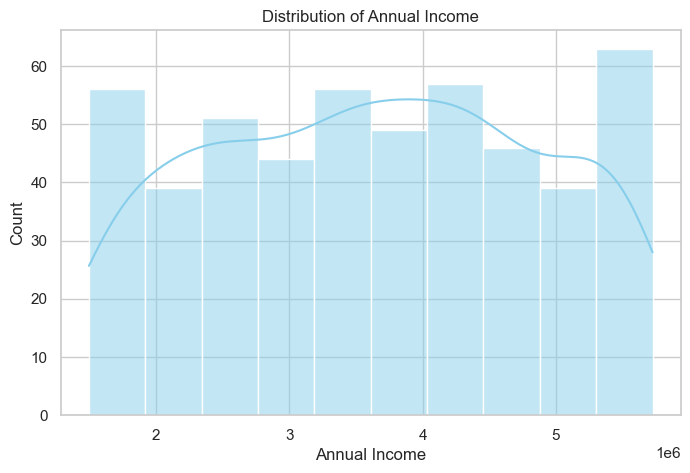

In [16]:
#Histogram 
#Distribution of Annual Income
plt.figure(figsize=(8,5))
sns.histplot(df['Annual Income'], kde=True, color='skyblue')
plt.title('Distribution of Annual Income')
plt.show()

In [17]:
## Key Point :- Above chart represent with a KDE curve with EDA the ditribution of annual income and its sightly right-skewed.

In [20]:
# Remove commas and convert AnnualIncome to numeric
df['Annual Income'] = df['Annual Income'].replace(',', '', regex=True).astype(float)
df['Annual Income'] = df['Annual Income'].replace(',', '', regex=True).astype(float)


In [21]:
for col in ['Annual Income', 'Spending Score', 'Tenure (Years)']:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


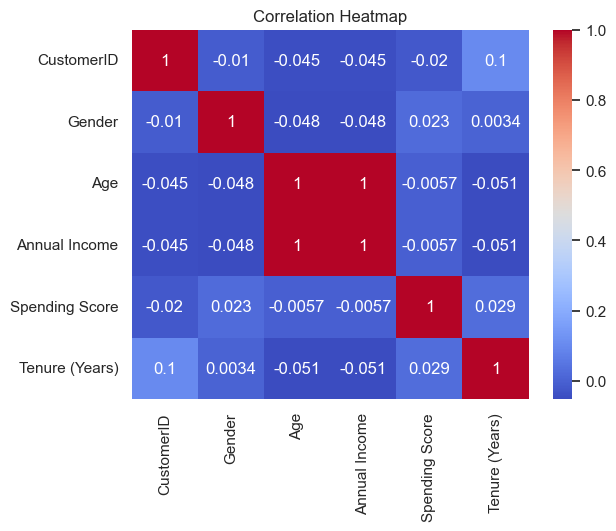

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [64]:
#The above Visurals shown that most variable are weakly correlated (values near to 0) features are mostly independent.

 # Feature Scaling

In [24]:
features = ['Age', 'Annual Income', 'Spending Score']  # Use columns you want to cluster
df_scaled = StandardScaler().fit_transform(df[features])

#  Determine Optimal Clusters
# Elbow Method and Silhouette Analysis

In [26]:
inertia = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))


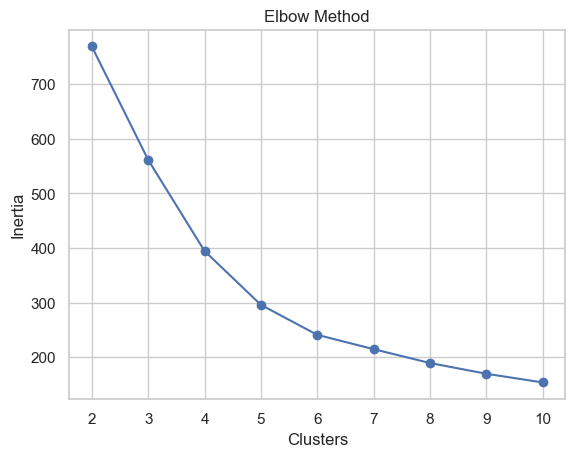

In [27]:
# Plot Elbow Method
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [66]:
#Intertia decrese rapidly from k=2 ,k=4. after k=4, the curve start flattening. so it appers around k = 4 & 5.

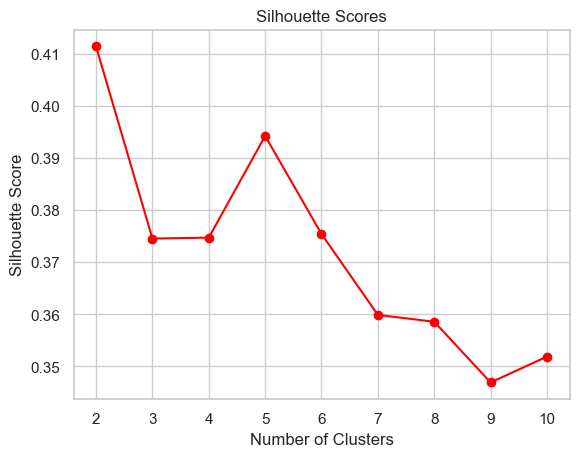

In [28]:
# Plot Silhouette Scores
plt.plot(range(2, 11), sil_scores, marker='o', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [29]:
###Key point - From above it shows a silhouette score plot used to evalute the optimal number of cluster in k- means. The higest score is 0.41 at k =2 
#it indicates that 2 cluster yield the best separtion and cohesion.

#  Apply K-Means (choose optimal clusters, e.g., 3)

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score,Profession,City,Membership Type,Tenure (Years),Cluster
0,1,1,38,3154000.0,7.0,Manager,Bangalore,Silver,1.0,1
1,2,0,49,4067000.0,14.0,Doctor,Mumbai,Silver,9.0,1
2,3,1,40,3320000.0,79.0,Artist,Delhi,Gold,7.0,2
3,4,1,50,4150000.0,7.0,Doctor,Chennai,Gold,8.0,1
4,5,1,20,1660000.0,9.0,Teacher,Pune,Silver,9.0,0


In [ ]:
# Notes : Applied K-Means to scaled features.
Each customer was assigned a cluster label (0, 1, 2).


# Visualize Clusters using PCA

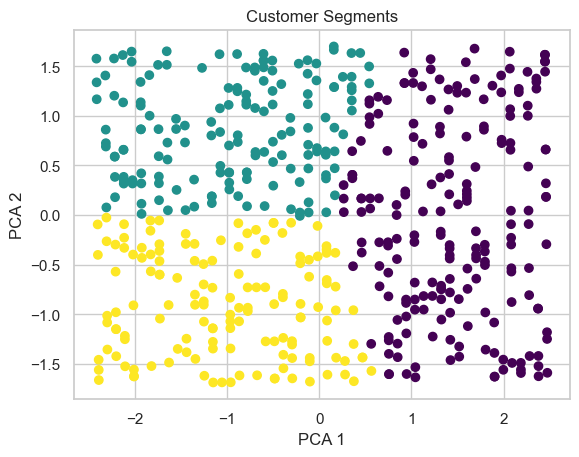

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
plt.scatter(principal_components[:,0], principal_components[:,1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments')
plt.show()

# Cluster Profiling

In [35]:
cluster_numeric = df.select_dtypes(include='number').groupby(df['Cluster']).mean()
cluster_categorical = df.select_dtypes(exclude='number').groupby(df['Cluster']).agg(lambda x: x.mode()[0])
cluster_profile = pd.concat([cluster_numeric, cluster_categorical], axis=1)
cluster_profile

,CustomerID,Gender,Age,Annual Income,Spending Score,Tenure (Years),Cluster,Profession,City,Membership Type
Cluster,,,,,,,,,,
0,260.965174,0.502488,28.592040,2.373139e+06,51.960199,5.527363,0.0,Manager,Mumbai,Silver
1,248.643312,0.452229,53.617834,4.450280e+06,25.579618,5.394904,1.0,Doctor,Chennai,Silver
2,237.739437,0.507042,54.471831,4.521162e+06,77.028169,5.239437,2.0,Doctor,Hyderabad,Silver


In [ ]:
# Cluster 0 → Young, moderate spenders → Potential future high-value customers.
#Cluster 1 → Older, low spenders → Stable but low engagement; need personalized offers.
# Cluster 2 → Older, high spenders → High-value customers; should be prioritized for loyalty and retention.

In [36]:
# 10. Save final dataset with clusters
df.to_csv('customer_segments.csv', index=False)
print("\nCustomer Segmentation completed! Output saved to 'customer_segments.csv'.")


Customer Segmentation completed! Output saved to 'customer_segments.csv'.
